# Load the data

In [23]:
import datetime
import pandas as pd
import numpy as np
import cPickle as pickle

In [24]:
with open('master_total_df.p','rb') as f:
    master_total_df = pickle.load(f)

In [25]:
master_total_df.head(2)

,index,company,jobdesc,city,state,title,sourcesite,views,days_posted,post_start_date,base_title,parsed_title,parsed_title_i,expanded_title,prefix_title
0,0,Advocate Health Care,"\nAs part of Advocate Health Care, Advocate Ch...",Oak Lawn,IL,Clinical Practice Specialist - 4 Hope,ind,0,NaN,NaN,specialist,"[clinical, practice, specialist, , , 4, hope]",[2],practice specialist,practice
1,1,University of Washington Medical Center,\nThe University of Washington (UW) is proud t...,Seattle,WA,WEB DEVELOPER,ind,0,NaN,NaN,developer,"[web, developer]",[1],web developer,web


# Look at the number of views(regression) / or if they have views at all (classification)

In [9]:
master_total_df[master_total_df.sourcesite =='lnk']['views'].describe()

count    8038.000000
mean      122.009579
std       373.737292
min         0.000000
25%         0.000000
50%         0.000000
75%        98.000000
max      7696.000000
Name: views, dtype: float64

(array([ 398.,    0.,  132.,    0.,    0.,   61.,    0.,   47.,    0.,
           0.,   46.,    0.,   26.,    0.,    0.,   29.,    0.,   21.,
           0.,    0.,   17.,    0.,   16.,    0.,    0.,   23.,    0.,
          15.,    0.,    0.,    9.,    0.,    8.,    0.,    0.,    8.,
           0.,    6.,    0.,    0.,    3.,    0.,    1.,    0.,    0.,
           3.,    0.,    1.,    0.,    2.]),
 array([  1. ,   1.4,   1.8,   2.2,   2.6,   3. ,   3.4,   3.8,   4.2,
          4.6,   5. ,   5.4,   5.8,   6.2,   6.6,   7. ,   7.4,   7.8,
          8.2,   8.6,   9. ,   9.4,   9.8,  10.2,  10.6,  11. ,  11.4,
         11.8,  12.2,  12.6,  13. ,  13.4,  13.8,  14.2,  14.6,  15. ,
         15.4,  15.8,  16.2,  16.6,  17. ,  17.4,  17.8,  18.2,  18.6,
         19. ,  19.4,  19.8,  20.2,  20.6,  21. ]),
 <a list of 50 Patch objects>)

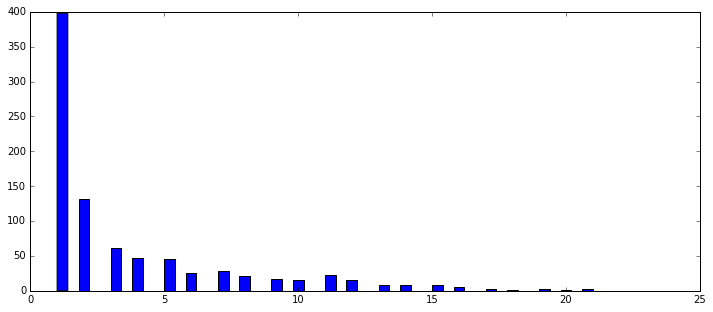

In [16]:
import matplotlib.pyplot as plt
% matplotlib inline
summary = master_total_df[master_total_df.sourcesite =='lnk']['views'].value_counts()
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(summary[summary<1000], bins=50)
ax.axes()

In [11]:
# how many have views
summary[summary.index>=1].sum()

3169

In [12]:
# how many don't
summary[summary.index==0].sum()

4869

# Do Word Analysis

In [41]:
master_sample = master_total_df[master_total_df.sourcesite =='lnk'].head(7000)
all_text = master_sample['jobdesc']

In [42]:
all_text.head(10)

14669    Python/SQL Analyst\n\nData Analysts capable of...
14670    The Broad Institute of Harvard and MIT is look...
14671    Stripe’s people are its most valuable resource...
14672    Facebook was built to help people connect and ...
14673    Description\n\nYou believe data can help resha...
14674    What We're Looking For:   Do you want to be a ...
14675    Accountabilities\n• Lead cutting edge research...
14676    This position as a Business Analyst IV is with...
14677    The Institute Research Investigator in Systems...
14678    If you are a Full Stack Developer with experie...
Name: jobdesc, dtype: object

In [43]:
# # cleaning all data for unicode for spacy
# uni_all_text = []
# i = 0
# for x in all_text:
#     i+=1
#     if i % 100==0:
#         print i,
#     local = []
#     for a in x:
#         try:
#             local.append(unicode(a))
#         except:
#             continue
#     uni_all_text.append(unicode(''.join(local)))


In [44]:
# # parts of speech
# for a in uni_all_text[0:1]:
#     y = parser(a)
#     for i,b in enumerate(y.sents):
#         print b
#         sent = [y[i] for i in range(b.start, b.end)]
#         for i, c in enumerate(sent) :
#             print c.orth_, c.pos_

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
text = all_text
cvec = CountVectorizer(stop_words='english', decode_error='ignore', encoding='utf-8',lowercase=True,ngram_range=(2,2))
start_time = datetime.datetime.now()
cvec.fit(text)
print (datetime.datetime.now() - start_time)/60

cdf  = pd.DataFrame(cvec.transform(text).todense(),
             columns=cvec.get_feature_names())
print (datetime.datetime.now() - start_time)/60

0:00:00.165691
0:00:00.344924


In [48]:
start_time = datetime.datetime.now()
summary = cdf.sum().sort_values(ascending=False)

machine learning         5204
years experience         3639
computer science         3395
big data                 3130
business analyst         2996
data science             2621
communication skills     2514
bachelor degree          2218
equal opportunity        1958
software development     1688
experience working       1677
problem solving          1670
large scale              1622
project management       1583
national origin          1505
opportunity employer     1447
sexual orientation       1446
fast paced               1425
data analysis            1424
business requirements    1416
ability work             1401
veteran status           1345
skills ability           1320
related field            1311
race color               1299
gender identity          1265
data mining              1257
cross functional         1252
data analytics           1221
best practices           1137
dtype: int64
0:00:02.585181


In [49]:
print  summary.head(30)
print (datetime.datetime.now() - start_time)/60

machine learning         5204
years experience         3639
computer science         3395
big data                 3130
business analyst         2996
data science             2621
communication skills     2514
bachelor degree          2218
equal opportunity        1958
software development     1688
experience working       1677
problem solving          1670
large scale              1622
project management       1583
national origin          1505
opportunity employer     1447
sexual orientation       1446
fast paced               1425
data analysis            1424
business requirements    1416
ability work             1401
veteran status           1345
skills ability           1320
related field            1311
race color               1299
gender identity          1265
data mining              1257
cross functional         1252
data analytics           1221
best practices           1137
dtype: int64
0:00:02.661320


# what features could be used for a matrix

In [47]:
print summary.count()
threshold = 5
print summary[summary >=threshold].count()
print summary[(summary < threshold) & (summary > 1)].count()
print summary[summary == 1].count()

590502
73260
169973
347269


## 

In [231]:
keep_columns = summary[summary >=threshold].index.values
keep_columns

array([u'years experience', u'communication skills', u'bachelor degree',
       ..., u'engineering related fields', u'implement improvements',
       u'status age characteristic'], dtype=object)

In [232]:
cdf[keep_columns].head(10)

,years experience,communication skills,bachelor degree,business analyst,computer science,problem solving,ability work,experience working,equal opportunity,big data,...,concepts techniques,acceptance testing new,warehouse etl,business analysis reporting,engineering strong,skills successful candidate,level clearance,engineering related fields,implement improvements,status age characteristic
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,1,0,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
start_time = datetime.datetime.now()
keep_cdf = cdf[keep_columns]
print (datetime.datetime.now() - start_time)/60

In [247]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
start_time = datetime.datetime.now()
kmeans.fit(keep_cdf)
print (datetime.datetime.now() - start_time)/60


0:00:00.222657


In [248]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print len(labels)
df = pd.DataFrame(labels)
df[0].value_counts()


2000


0    1681
5     286
2      17
3       8
1       6
4       2
Name: 0, dtype: int64

In [245]:
master_sample['cluster'] = labels

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [246]:
master_sample.head()

,index,company,jobdesc,city,state,title,base_title,parsed_title,parsed_title_i,expanded_title,prefix_title,cluster
0,0,Advocate Health Care,"\nAs part of Advocate Health Care, Advocate Ch...",Oak Lawn,IL,Clinical Practice Specialist - 4 Hope,specialist,"[clinical, practice, specialist, , , 4, hope]",[2],practice specialist,practice,0
1,1,University of Washington Medical Center,\nThe University of Washington (UW) is proud t...,Seattle,WA,WEB DEVELOPER,developer,"[web, developer]",[1],web developer,web,0
2,2,Macy's,"\nJob Overview:\n\n\nThe Analyst, Marketing An...",New York,NY,"Analyst, Marketing Analytics",analyst,"[analyst, , marketing, analytics]",[0],analyst,analyst,0
3,3,Skyport Systems,\nSkyport Systems is developing groundbreaking...,Mountain View,CA,Data Engineer,engineer,"[data, engineer]",[1],data engineer,data,0
4,4,Command Alkon,"\nCommand Alkon, a global leader in integrated...",Oak Brook,IL,Application Implementation Specialist,specialist,"[application, implementation, specialist]",[2],implementation specialist,implementation,0
